In [870]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [871]:
def f1(x):
    x,y,z = x
    return (x - z)**2 + (2*y + z)**2 + (4*x - 2*y + z)**2 + x + y

def grad_f1(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*(x - z) + 8*(4*x - 2*y + z) + 1
    dy = 4*(2*y + z) - 4*(4*x - 2*y + z) + 1
    dz = -2*(x - z) + 2*(2*y + z) + 2*(4*x - 2*y + z)
    
    return np.array([dx, dy, dz])

def hess_f1(x):
    dxx = 34 # 2 + 32
    dxy = -16
    dxz = 6 #-2 + 8
    dyy = 16
    dyz = 0
    dzz = 6
    
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [872]:
f1_x1 = np.array([0,0,0]) 
f1(f1_x1), grad_f1(f1_x1), hess_f1(f1_x1)

(np.int64(0),
 array([1, 1, 0]),
 array([[ 34, -16,   6],
        [-16,  16,   0],
        [  6,   0,   6]]))

In [873]:
def f2(x):
    x,y,z = x
    return (x - 1)**2 + (y - 1)**2 + 100*(y-x**2)**2 + 100*(z-y**2)**2

def grad_f2(x):
    x,y,z = x[0], x[1], x[2]
    dx = 2*x - 2 - 400 * x * y + 400 * x**3
    dy = 2*y - 2 + 200 * (y - x**2) - 400*z*y + 400 * y**3
    dz = 200 * (z - y**2)
        
    return np.array([dx, dy, dz])

def hess_f2(x):
    x,y,z = x[0], x[1], x[2]
    
    dxx = 2 - 400 * y + 1200 * x**2
    dxy = -400 * x
    dxz = 0
    dyy = 2 + 200 - 400 * z + 1200 * y**2
    dyz = -400 * y
    dzz = 200
    return np.array([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])

In [874]:
f2_x1 = np.array([1.2, 1.2, 1.2])
f2(f2_x1), grad_f2(f2_x1), hess_f2(f2_x1)

(np.float64(11.6),
 array([115.6,  67.6, -48. ]),
 array([[1250., -480.,    0.],
        [-480., 1450., -480.],
        [   0., -480.,  200.]]))

In [875]:
def f3(x):
    x,y = x
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def grad_f3(x):
    x,y = x[0], x[1]
    
    dx = -12.75 * 6*x + 3*y - 4*x*y - 2*x*y**2 + 4.5*y**2 + 2*x*y**4 - 4*x*y**3 + 5.25 * y**3 + 2*x*y**6
    dy = 3*x + 9*y*x - 4*x**2*y - 2*x**2 + 15.75*y**2 *x + 2*x**2 * y - 6 * x**2 * y**2 + 4*x**3*y**3 + 6*x**2*y**5
    
    return np.array([dx, dy])

def hess_f3(x):
    x,y = x[0], x[1]
    
    dxx = 6 - 4*y - 2*y**2 + 2*y**4 - 4*y**3 + 2*y**6
    dxy = 3 - 4*x - 4*x*y + 9*y + 8*x*y**3 - 12*x*y**2 + 15.75*y**2 + 12*x*y**5
    dyy = 9*x - 4*x**2 + 31.5*y*x + 2*x**2 - 12*x**2*y + 12*x**2*y**2 + 30*x**2*y**4
    return np.array([[dxx, dxy], [dxy, dyy]])

In [876]:
f3_x1 = np.array([1,1])
f3(f3_x1), grad_f3(f3_x1), hess_f3(f3_x1)

(np.float64(14.203125),
 array([-69.75,  27.75]),
 array([[ 0.  , 27.75],
        [27.75, 68.5 ]]))

In [877]:
def learning_rate(i):
    return 1e-5 * 0.99**i

In [878]:
def gd(x, grad_f, lr_fn, n_steps, t=None):
    
    if t is not None:
        i = 0
        start = time.perf_counter()
        while time.perf_counter() - start < t:
            x = x - lr_fn(i) * grad_f(x)
            i += 1
    else:
        for i in range(n_steps):
            x = x - lr_fn(i) * grad_f(x)
        
    return x 
    

In [879]:

def polyak(x: np.ndarray, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = x
    
    if t is not None:
        start = time.perf_counter()
        i = 0
        while time.perf_counter() - start < t:
            dx = grad_f(x)
            x_new = x - lr_fn(i) * dx  + mu * (x - x_prev)
        
            x_prev = np.copy(x)
            x = x_new
            i+=1
        print(i)
        return x
    else:
        for i in range(n_steps):
            dx = grad_f(x)
            x_new = x - lr_fn(i) * dx  + mu * (x - x_prev)
        
            x_prev = x
            x = x_new
            i+=1
    return x

In [880]:
def nesterov(x, f, grad_f, lr_fn, mu, n_steps, t=None):
    x_prev = np.copy(x)
    
    if t is not None:
        start = time.perf_counter()
        i = 0
        while time.perf_counter() - start < t:
            x_ahead = x + mu * (x - x_prev)
            dx = grad_f(x_ahead)
            x_new = x - lr_fn(i) * dx + mu * (x - x_prev)
    
            x_prev = x
            x = x_new
            i+=1
    else:
        for i in range(n_steps):
            x_ahead = x + mu * (x - x_prev)
            dx = grad_f(x_ahead)
            x_new = x - lr_fn(i) * dx + mu * (x - x_prev)
    
            x_prev = x
            x = x_new
            i+=1
        
    return x

In [920]:

def adagrad(x, grad_f, lr_fn, n_steps, eps=1e-8, t=None):
    x = np.array(x, dtype=float)
    n = len(x)
    lr = .4
    
    grad_sq_sum = np.zeros(n)
    
     
    if t is not None:
        start = time.perf_counter()
        i = 0
        while time.perf_counter() - start < t:
            grad = np.array(grad_f(x))
        
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            # Adaptive step
            step = lr * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new
            i+= 1
        print(i)
        return x
    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))
            
            # Accumulate squared gradients
            grad_sq_sum += grad ** 2
            
            # Compute D_k^{-1/2}
            D_inv_sqrt = np.diag(1.0 / (np.sqrt(grad_sq_sum) + eps))
            
            # Adaptive step
            step = lr * D_inv_sqrt @ grad
            x_new = x - step
            
            x = x_new

    return x


In [882]:
f1(adagrad(f1_x1, grad_f1, learning_rate, 100))

np.float64(-0.19791666666565474)

Newton and BFGS

In [883]:
import numpy as np

def is_positive_definite(H):
    try:
        np.linalg.cholesky(H)
        return True
    except np.linalg.LinAlgError:
        return False


In [884]:
def newton(x0, grad_f, hess_f, n_steps=100, t=None, lr=None):
    x = np.array(x0, dtype=float)
    
    if t is not None:
        start = time.perf_counter()
        i = 0
        while time.perf_counter() - start < t:
            grad = np.array(grad_f(x))
            hess = np.array(hess_f(x))
            
            hess_inv = np.linalg.inv(hess)
            
            lr = lr if lr is not None else learning_rate(i)
            # Compute Newton step
            x = x - learning_rate(i) * hess_inv @ grad
            i += 1

    else:
        for i in range(n_steps):
            grad = np.array(grad_f(x))

            hess = np.array(hess_f(x)) + 1e-4 * np.eye(len(x))
            
            hess_inv = np.linalg.inv(hess)
            
            # Compute Newton step
            x = x - hess_inv @ grad
        
    return x

In [885]:
# minimum3(f2), print("Newton: ", f2(newton(np.array([0,0,0]), grad_f1, hess_f1, 100)))


In [886]:
def sgd(x, grad_f, lr_fn, n_steps=100, t=None):
    x = np.array(x, dtype=float)

    for i in range(n_steps):
        grad = grad_f(x) 
        x = x - lr_fn(i) * grad

    return x


### BFGS

In [887]:
def bfgs(x, grad_f, lr_fn, n_steps, t=None):
    B = np.eye(len(x)) * 0.0001
    grad = grad_f(x)

    for i in range(n_steps):
        x_new = x - B @ grad
        grad_new = grad_f(x_new)

        delta = (x_new - x).reshape((-1, 1))
        gamma = (grad_new - grad).reshape((-1, 1))
        rho = 1.0 / (delta.T @ gamma + 1e-10)

        if np.isfinite(rho) and rho > 0:
            I = np.eye(len(x))
            B = (I - rho * delta @ gamma.T) @ B @ (I - rho * gamma @ delta.T) + rho * delta @ delta.T

        x, grad = x_new, grad_new
        # print(f"x: {x.flatten()}, grad norm: {np.linalg.norm(grad)}")

    return x


In [888]:
# bfgs(np.array([1,0,0]), grad_f1, hess_f1, 100), minimum3(f1)


In [889]:
# f3(bfgs(np.array([1,0]), grad_f3, hess_f3, 100)), minimum2(f3)


In [890]:
bfgs(np.array([1,0,0]), grad_f2, hess_f2, 100)

array([1., 1., 1.])

In [891]:
import numpy as np

def l_bfgs(x, grad_f, m=10, n_steps=100):
    grad = grad_f(x).reshape(-1, 1)

    B = []      
    gamma = []  
    rho = []  

    for step in range(n_steps):
        q = grad.copy()
        alpha = []

        for i in reversed(range(len(B))):
            s_i, y_i, rho_i = B[i], gamma[i], rho[i]
            alpha_i = rho_i * (s_i.T @ q).item()
            alpha.append(alpha_i)
            q = q - alpha_i * y_i

        if B:
            s_last, y_last = B[-1], gamma[-1]
            H0 = (s_last.T @ y_last).item() / (y_last.T @ y_last).item()
            r = H0 * q
        else:
            r = q

        for i in range(len(B)):
            s_i, y_i, rho_i = B[i], gamma[i], rho[i]
            beta_i = rho_i * (y_i.T @ r).item()
            r = r + s_i * (alpha[-(i + 1)] - beta_i)

        x_new = x - r.flatten()
        grad_new = grad_f(x_new).reshape(-1, 1)

        s_k = (x_new - x).reshape(-1, 1)
        y_k = (grad_new - grad).reshape(-1, 1)
        ys = (y_k.T @ s_k).item()

        if ys > 1e-10:  # safeguard
            rho_k = 1.0 / ys
            if len(B) == m:
                B.pop(0)
                gamma.pop(0)
                rho.pop(0)
            B.append(s_k)
            gamma.append(y_k)
            rho.append(rho_k)

        x, grad = x_new, grad_new

    return x


In [892]:
f2(bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100))

np.float64(5.546678239835239e-31)

In [893]:
l_bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100)


array([0.7949332 , 0.63239939, 0.4028514 ])

In [894]:
f2(np.array([1,1,1]))

np.int64(0)

In [895]:
# minimum3(f2), print("BFGS: ", bfgs(np.array([0,0,0]), grad_f2, hess_f2, 100))


# Testing

In [896]:
def minimum2(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 1000)
    ys = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(np.array([X, Y]))  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    return np.array([bx, by, bz])

In [897]:
def minimum3(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-3, 3, 100)
    ys = np.linspace(-3, 3, 100)
    zs = np.linspace(-3, 3, 100)
    
    X, Y, Z = np.meshgrid(xs, ys, zs)  
    W = f(np.array([X, Y, Z]))  
    
    min_idx = np.unravel_index(np.argmin(W), W.shape)  
    bx, by, bz, bw = X[min_idx], Y[min_idx], Z[min_idx], W[min_idx]
    return np.array([bx, by, bz, bw])

In [898]:
f1_xopt = minimum3(f1)
f2_xopt = minimum3(f2)
f3_xopt = minimum2(f3)
print("f1 minimum:", f1_xopt)
print("f2 minimum:", f2_xopt)
print("f3 minimum:", f3_xopt)

f1 minimum: [-0.15151515 -0.21212121  0.15151515 -0.19651056]
f2 minimum: [1. 1. 1. 0.]
f3 minimum: [3.00000000e+00 5.01501502e-01 5.21242614e-05]


In [899]:
def minimum(f):
    if f == f1 or f == f2:
        return minimum3(f)
    return minimum2(f)

In [921]:
def test_steps(f, grad_f, hess_f, x0, steps):
    print("True minimum", minimum(f)[-1], "at ", minimum(f)[:-1])
    for step in steps:
        print("Steps, ", step)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.1, step)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.1, step)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, step)))
        # print("Newton: ", f(newton(x0, grad_f, hess_f, step)))
        print()

In [922]:
def learning_rate(i):
    return 1e-5 * 0.99**i

In [923]:
f1x0 = np.array([0, 0, 0])
f1x1 = np.array([1, 1, 0])
f2x0 = np.array([1.2, 1.2, 1.2])
f2x1 = np.array([-1, 1.2, 1.2])
f3x0 = np.array([1,1])
f3x1 = np.array([4.5, 4.5])

steps = [2, 5, 10, 100]
f = f3
grad_f = grad_f3
hess_f = hess_f3

test_steps(f, grad_f, hess_f, f3x1, steps)

True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  766.5966317471315
Polyak:  317.3669399261159
Nesterov:  337.8935150873536
Adagrad:  58009.331518370884

Steps,  5
GD:  573.3181260243873
Polyak:  234.18423832681148
Nesterov:  251.2675637282102
Adagrad:  30478.918874218594

Steps,  10
GD:  391.01982633597123
Polyak:  180.14097490210202
Nesterov:  191.6422296038764
Adagrad:  16621.878755146845

Steps,  100
GD:  41.4483127130285
Polyak:  27.34367484514155
Nesterov:  28.13095223694685
Adagrad:  1315.5377354409761



In [645]:
# test_steps(f, grad_f, hess_f, f1x1, steps)

In [646]:
def learning_rate(i):
    return 0.001 * 0.99**i

In [647]:
f = f2
grad_f = grad_f2
hess_f = hess_f2

print(f2x0)
test_steps(f, grad_f, hess_f, f2x0, steps)

[1.2 1.2 1.2]
True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  0.04360204395724923
Polyak:  0.029878998002554
Nesterov:  0.02673542046251252
Adagrad:  11.212136336931973
Newton:  6.486502125611452

Steps,  5
GD:  0.018222098858116126
Polyak:  0.018111957810387373
Nesterov:  0.01825287933581621
Adagrad:  10.884354328434366
Newton:  7.82723804484026

Steps,  10
GD:  0.018114796902295175
Polyak:  0.018026193463732743
Nesterov:  0.018042756516489775
Adagrad:  10.524769246910026
Newton:  32.57752757205745

Steps,  100
GD:  0.017367128919067866
Polyak:  0.017199958422235238
Nesterov:  0.01721471000097329
Adagrad:  8.795304386701261
Newton:  3523.7010595623265



In [648]:
test_steps(f, grad_f, hess_f, f2x1, steps)

True minimum 0.0 at  [1. 1. 1.]
Steps,  2
GD:  5.229583521614642
Polyak:  4.478010157939434
Nesterov:  5.73751903199277
Adagrad:  13.332066264049159
Newton:  13.335799674114092

Steps,  5
GD:  4.227341057837024
Polyak:  4.206751434677671
Nesterov:  4.320012289083483
Adagrad:  12.938862640765567
Newton:  20.325429321856642

Steps,  10
GD:  4.20332860424492
Polyak:  4.202417733869578
Nesterov:  4.200249207030582
Adagrad:  12.50992146936056
Newton:  47.99574664249103

Steps,  100
GD:  4.162038855665383
Polyak:  4.156500293012095
Nesterov:  4.153848805697812
Adagrad:  10.487659531267003
Newton:  3589.711514754642



In [649]:
def learning_rate(i):
    return 0.00002 * 0.99**i

In [650]:
f = f3
grad_f = grad_f3
hess_f = hess_f3

test_steps(f, grad_f, hess_f, f3x0, steps)

True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  14.172429833366285
Polyak:  14.170885263029238
Nesterov:  14.170884914992083
Adagrad:  14.20218149283947
Newton:  14.196702713495865

Steps,  5
GD:  14.127347739705236
Polyak:  14.120737629445859
Nesterov:  14.120735973611062
Adagrad:  14.201359799053826
Newton:  14.24856149388566

Steps,  10
GD:  14.054718428955553
Polyak:  14.03986085307536
Nesterov:  14.039856892179442
Adagrad:  14.200432977586338
Newton:  14.203125211194463

Steps,  100
GD:  13.175395207257178
Polyak:  13.055663113603089
Nesterov:  13.055622129439703
Adagrad:  14.19557041905663
Newton:  14.203125



In [651]:
test_steps(f, grad_f, hess_f, f3x1, steps)


True minimum 5.2124261432689534e-05 at  [3.        0.5015015]
Steps,  2
GD:  12.43281596089588
Polyak:  48.929151079532424
Nesterov:  48.26973667113842
Adagrad:  174802.90334024787
Newton:  174787.39590967732

Steps,  5
GD:  12.513887697772656
Polyak:  55.536960158281005
Nesterov:  54.584161483235654
Adagrad:  174793.794192175
Newton:  174748.44359514368

Steps,  10
GD:  12.646195813283086
Polyak:  51.47237658916009
Nesterov:  50.672956432744265
Adagrad:  174783.51999161392
Newton:  174683.519713985

Steps,  100
GD:  14.418963181952417
Polyak:  30.205778485525904
Nesterov:  30.018365665044307
Adagrad:  174729.62288745432
Newton:  173514.16284713175



In [669]:
def test_time(f, grad_f, hess_f, x0, step, times):
    print("True minimum", f2_xopt[-1])
    for _time in times:
        print("Time, ", _time)
        print("GD: ", f(gd(x0, grad_f, learning_rate, step, t=_time)))
        print("Polyak: ", f(polyak(x0, grad_f, learning_rate, 0.1, step, t=_time)))
        print("Nesterov: ", f(nesterov(x0, f, grad_f, learning_rate, 0.1, step, t=_time)))
        print("Adagrad: ", f(adagrad(x0, grad_f, learning_rate, 0.1, step, t=_time)))
        print("Newton: ", f(newton(x0, grad_f, hess_f, step, t=_time)))
        print()

In [670]:
def learning_rate(i):
    return 1e-7 * 0.99**i

In [964]:
import time 


times = [.1, 1, 2]
f = f3
grad_f = grad_f3
hess_f = hess_f3
step = np.inf
test_time(f, grad_f, hess_f, f3x0, step, times)


True minimum 0.0
Time,  0.1
GD:  13.401122498587917
10173
Polyak:  13.308054412396082
Nesterov:  13.308043500912778
6472
Adagrad:  14.203125
Newton:  14.271969731748074

Time,  1
GD:  13.401122498587917
104063
Polyak:  13.308054412396082
Nesterov:  13.308043500912778
69033
Adagrad:  14.203125
Newton:  14.271969731748074

Time,  2
GD:  13.401122498587917
207707
Polyak:  13.308054412396082
Nesterov:  13.308043500912778
139561
Adagrad:  14.203125
Newton:  14.271969731748074



### Linear regression

In [796]:
def get_data(N):
    np.random.seed(0)
    return np.array([np.array([i, i + np.random.random(1).item()]) for i in range(N)])

In [ ]:
class LinearRegression:
    def __init__(self, steps=1000, base_lr=1e-3):
        self.coef_ = None
        self.intercept_ = None
        self.mu = 0.05
        self.steps = steps
        self.lr = lambda x: base_lr * 0.99**x #if lr is None else lr

    def gd(self, theta, loss_grad, lr_fn=None):
        return gd(theta, loss_grad, self.lr, self.steps)
    
    def newton(self, theta, loss_grad, hess_grad, lr):
        return newton(theta, loss_grad, hess_grad, self.steps, lr=self.lr)

    def sgd(self, theta, grad_f, lr_fn):
        return sgd(theta, grad_f, self.lr, n_steps=self.steps)

    def bfgs(self, theta, grad_f, lr_fn):
        return bfgs(theta, grad_f, self.lr, n_steps=self.steps)

    def l_bfgs(self, theta, grad_f, lr_fn):
        return l_bfgs(theta, grad_f, self.lr, n_steps=self.steps)


    def fit(self, X, y, lr_fn=None, t=None):
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples, n_features = X.shape

        # Add bias column
        X_aug = np.hstack([X, np.ones((n_samples, 1))])
        theta = np.array([0,0])#np.random.rand(n_features + 1)

        def loss_grad(theta):
            print(theta)
            preds = X_aug @ theta
            grad = (2 / n_samples) * X_aug.T @ (preds - y)

            # Print least squares
            loss = np.mean((preds - y) ** 2)
            print("Loss:", loss)

            return grad
        
        def sgd_loss_grad(theta):
            i = np.random.randint(n_samples)
            Xi = X_aug[i:i+1]  # shape (1, d+1)
            yi = y[i]
            
            pred = Xi @ theta
            
            print(theta)
            loss = np.mean((X_aug @ theta - y) ** 2)
            print("Loss:", loss)
            
            return 2 * Xi.T @ (pred - yi)  # shape (d+1,)

        def loss_hessian(theta):
            return (2 / n_samples) * X_aug.T @ X_aug

        # theta_opt = self.gd(theta, loss_grad, self.lr)
        theta_opt = self.newton(theta, loss_grad, loss_hessian, .5)
        # theta_opt = self.sgd(theta, sgd_loss_grad, lr_fn)
        # theta_opt = self.bfgs(theta, loss_grad, lr_fn)
        # theta_opt = self.l_bfgs(theta, loss_grad, lr_fn)
        
        self.coef_ = theta_opt[:-1]
        self.intercept_ = theta_opt[-1]

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.coef_ + self.intercept_


In [961]:
model = LinearRegression(base_lr=1e-10, steps=100)

data = get_data(100000)

start = time.time()
model.fit(data[:,0].reshape((-1, 1)), data[:,1])
print("Time:", time.time() - start)

[0. 0.]
Loss: 3333333399.4732695
[3.17402651e-01 7.96753399e-06]
Loss: 1553141344.8653238
[5.09614115e-01 1.30644941e-05]
Loss: 801606913.8428366
[1.36998646e+00 2.21586663e-05]
Loss: 456274564.73433053
[8.44101052e-01 1.60139248e-05]
Loss: 81021529.60915413
[9.89154150e-01 1.80983505e-05]
Loss: 392645.65737526317
[1.0054399e+00 1.8281666e-05]
Loss: 98368.32059373456
[1.00376954e+00 1.82403664e-05]
Loss: 47175.67160862663
[1.00348139e+00 1.82261622e-05]
Loss: 40225.76661935088
[1.00015656e+00 1.81800154e-05]
Loss: 74.195202394368
[1.00015644e+00 1.81799893e-05]
Loss: 74.08264288668461
[1.00015200e+00 1.81796989e-05]
Loss: 69.73277238034764
[1.00015074e+00 1.81795420e-05]
Loss: 68.5279803347919
[1.00014859e+00 1.81793537e-05]
Loss: 66.49008165976012
[9.99926101e-01 1.81769511e-05]
Loss: 22.235948480517166
[9.99967540e-01 1.81777301e-05]
Loss: 5.470272917355287
[9.99981968e-01 1.81780935e-05]
Loss: 2.3196341969391443
[1.00000354e+00 1.81784101e-05]
Loss: 0.19764557255927728
[1.00000424e+

In [962]:
model.coef_, model.intercept_

(array([1.00001135]), np.float64(1.817986535481756e-05))

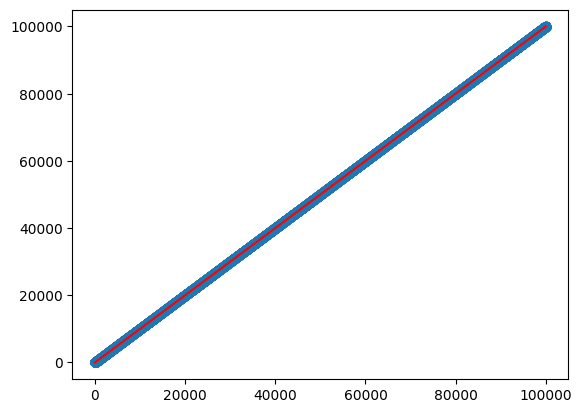

In [963]:
plt.scatter(data[:, 0], data[:, 1])

x_vals = np.sort(data[:, 0])
y_vals = model.predict(x_vals.reshape(-1, 1))

plt.plot(x_vals, y_vals, color='red')
